# Importing necessary packages

In [6]:
from transformers import pipeline
import matplotlib.pyplot as plt
import re

In [7]:
emotion = pipeline('sentiment-analysis', model='arpanghoshal/EmoRoBERTa')

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


# File Reading
## Reading the interview.txt and cleaning the data in form of single sentences

In [15]:
# Open the interview.txt file for reading
with open('mix.txt', 'r') as file:
    # Read the content of the file
    interview_text = file.read()

# Split the text into sentences using end line
result = []
sentences = re.split(r'[.\n]', interview_text)
# Process each sentence
for sentence in sentences:
    # Remove any leading/trailing whitespace
    sentence = sentence.strip()
    
    # Check if the sentence is not empty (to avoid printing empty strings)
    if sentence:
        # Print the sentence
        result.append(sentence)

## Processing each sentence and evaluating the emotion in that sentence

In [18]:
emotion_frequency = {}
# Process each sentence
for sentence in result:
    result = emotion(sentence)
    
    for item in result:
        emotion_label = item['label']
        if emotion_label in emotion_frequency:
            emotion_frequency[emotion_label] += 1
        else:
            emotion_frequency[emotion_label] = 1
    #print(sentence,'|',emotion_label)



I strongly disapprove of the way they handled that situation; it was completely irresponsible | disapproval
It's disappointing to see such a lack of integrity in their actions | disappointment
I can't condone their behavior; it goes against all ethical principles | disapproval
Their decision was ill-advised and poorly thought out | disapproval
Her dedication and unwavering commitment to her work are truly inspiring | admiration
I have immense respect for his ability to stay calm under pressure | admiration
The way she handles difficult situations with grace and poise is truly remarkable | admiration
I'm constantly in awe of his incredible talent and creativity | admiration
So suppose you use in, suppose for example, sorry, in my current project I use in, I work in a schedule tool using Lookup | neutral
Every setback is just a setup for a comeback! | neutral
The future holds endless possibilities for growth and success | optimism
I have a feeling that this project is going to exceed all

# Plotting 

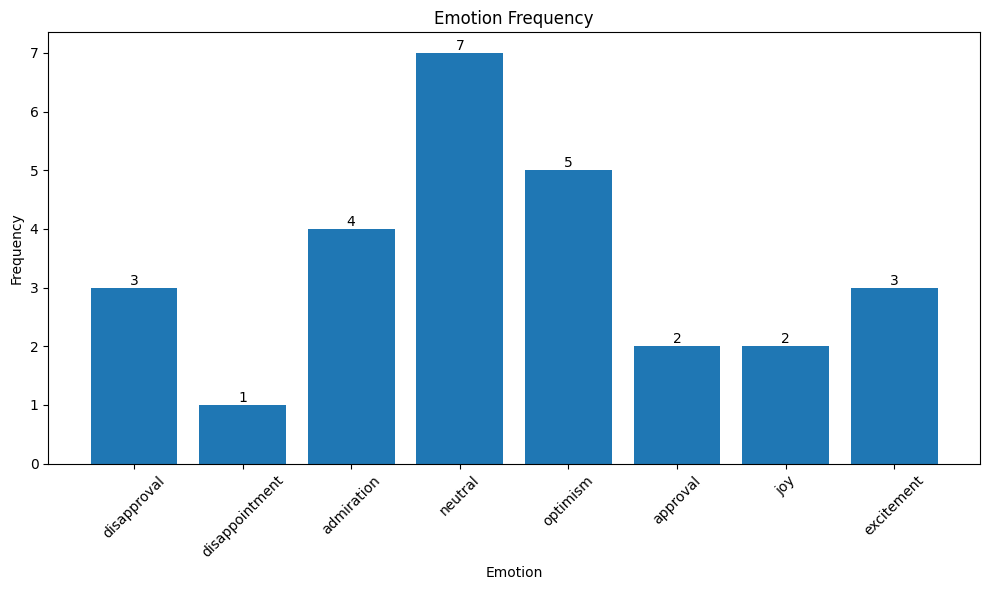

In [13]:
# Emotion labels and their corresponding frequencies
emotion_labels = list(emotion_frequency.keys())
emotion_frequencies = list(emotion_frequency.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(emotion_labels, emotion_frequencies)
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.title('Emotion Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Add actual values as text labels on the bars
for i, freq in enumerate(emotion_frequencies):
    plt.text(i, freq, str(freq), ha='center', va='bottom')

plt.tight_layout()

# Display the bar chart
plt.show()
